# Бактыбекова Назима AIN-2-21 

## Лабораторная работа №5 load_diabetes()

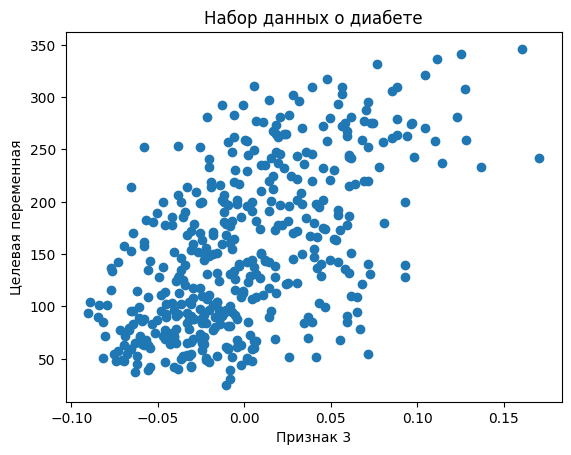

In [60]:
import matplotlib.pyplot as plt
# Загружаем данные о диабете из библиотеки scikit-learn
from sklearn.datasets import load_diabetes
# Загружаем набор данных о диабете и сохраняем его в переменной "diabetes"
diabetes = load_diabetes()
# Для простоты визуализации, выбираем только один признак - третий признак с индексом 2
X = diabetes.data[:, 2]
# Извлекаем целевую переменную и сохраняем её в переменной "y"
y = diabetes.target
# Создаем заголовок для графика
plt.title("Набор данных о диабете")
# Рисуем точечный график, где по оси X - выбранный признак, а по оси Y - целевая переменная
plt.plot(X, y, 'o')
# Устанавливаем подпись для оси X
plt.xlabel("Признак 3")
# Устанавливаем подпись для оси Y
plt.ylabel("Целевая переменная")
# Отображаем график
plt.show()

In [61]:
# Выводим список ключей словаря, возвращаемого функцией "load_diabetes()"
print("Ключи diabetes(): \n{}".format(diabetes.keys()))

Ключи diabetes(): 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [62]:
# Выводим форму (размерность) массива "data" для набора данных diabetes
print("Форма массива data для набора diabetes: {}".format(diabetes.data.shape))

Форма массива data для набора diabetes: (442, 10)


In [63]:
# Выводим имена признаков из набора данных diabetes
print("Имена признаков:\n{}".format(diabetes.feature_names))

Имена признаков:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### KNeighborsClassifier

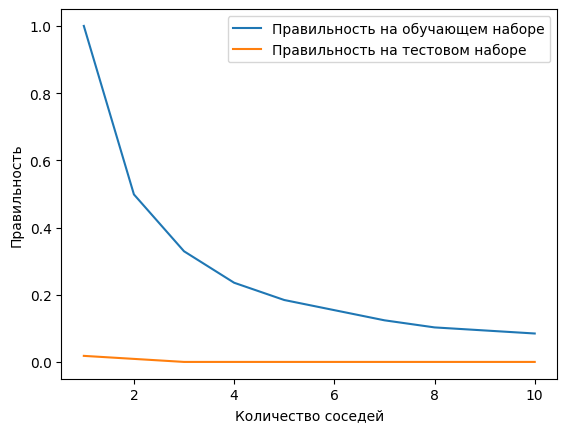

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=66)

# Создаем пустые списки для сохранения точности модели
training_accuracy = []
test_accuracy = []

# Определяем, сколько соседей использовать (от 1 до 10)
neighbors_settings = range(1, 11)

# Проходим по разным значениям соседей
for n_neighbors in neighbors_settings:
    # Создаем модель с указанным количеством соседей
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Обучаем модель на обучающем наборе данных
    clf.fit(X_train, y_train)
    
    # Записываем точность модели на обучающем наборе
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Записываем точность модели на тестовом наборе
    test_accuracy.append(clf.score(X_test, y_test))

# Строим графики точности модели на обучающем и тестовом наборах для разных значений соседей
plt.plot(neighbors_settings, training_accuracy, label="Правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="Правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("Количество соседей")
plt.legend()

### KNeighborsRegressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Создаем экземпляр модели K-ближайших соседей для регрессии и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors=3)

# Обычно здесь следует предварительно разделить данные на обучающий и тестовый наборы, но в вашем примере это уже должно быть выполнено ранее

# Подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [66]:
# Выполняем прогноз на тестовом наборе данных и выводим результат
predicted_values = reg.predict(X_test)
print("Прогноз для тестового набора:\n{}".format(predicted_values))

Прогноз для тестового набора:
[178.         175.         108.          95.66666667 151.33333333
  97.33333333 111.         119.66666667 156.         162.33333333
 163.66666667 136.33333333 112.33333333  86.66666667 158.33333333
 136.33333333  70.66666667 176.33333333 144.         160.33333333
 249.         130.33333333 150.66666667 150.66666667  99.
 137.         140.66666667 231.66666667 116.         186.66666667
 229.         262.66666667 235.66666667 169.         145.66666667
 116.66666667  74.66666667 105.66666667 202.66666667 139.66666667
 230.         148.33333333  76.66666667  66.         123.
 162.33333333 102.33333333 204.33333333  62.         277.33333333
 166.33333333 157.33333333 119.         282.66666667 126.
 183.33333333 249.33333333 108.         160.66666667 123.66666667
 275.33333333 162.33333333  88.33333333  78.33333333 155.33333333
 184.         119.         258.66666667 177.66666667 134.33333333
 116.66666667 109.66666667 161.66666667 111.         132.33333333
 118

In [67]:
# Вычисляем и выводим R^2 на обучающем наборе данных
r2_train = reg.score(X_train, y_train)
print("R^2 на обучающем наборе: {:.2f}".format(r2_train))

# Вычисляем и выводим R^2 на тестовом наборе данных
r2_test = reg.score(X_test, y_test)
print("R^2 на тестовом наборе: {:.2f}".format(r2_test))

R^2 на обучающем наборе: 0.70
R^2 на тестовом наборе: 0.36


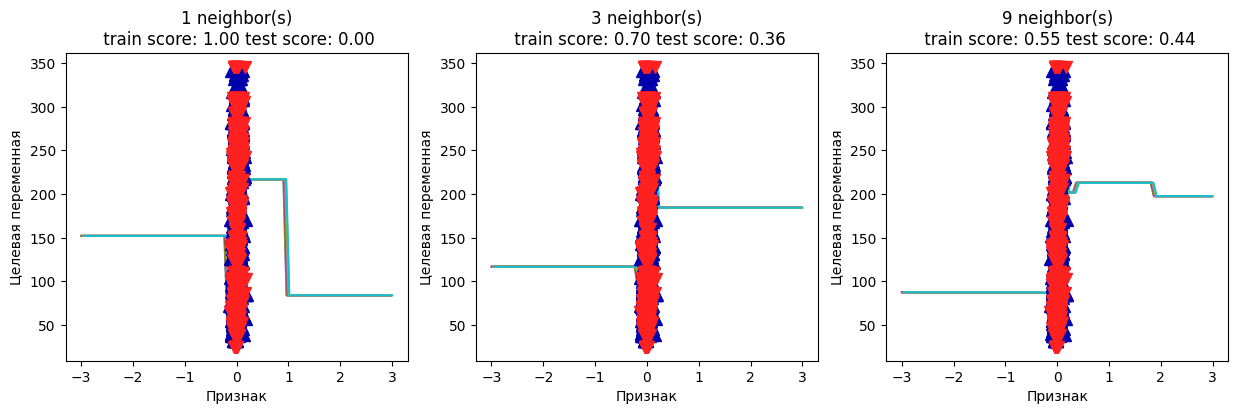

In [68]:
# здесь мы используем сразу все 10 существующих признаков
# и как можем заметить количество в 3 соседей дает одинаковый результат, как в предыдущем примере
# я убрала тут легенду, так как в нее не поместились все значения
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 10)

# Проходим по разным значениям количества соседей (1, 3, и 9)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # Создаем модель K-ближайших соседей с указанным количеством соседей
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    
    # Рисуем график прогнозов для заданных точек
    ax.plot(line, reg.predict(line))
    
    # Рисуем обучающие точки данных на графике (значки "^")
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    
    # Рисуем тестовые точки данных на графике (значки "v")
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    # Устанавливаем заголовок графика, отображая значение количества соседей и коэффициент детерминации R^2 для обучающего и тестового наборов данных
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    
    # Устанавливаем подпись для оси X
    ax.set_xlabel("Признак")
    
    # Устанавливаем подпись для оси Y
    ax.set_ylabel("Целевая переменная")

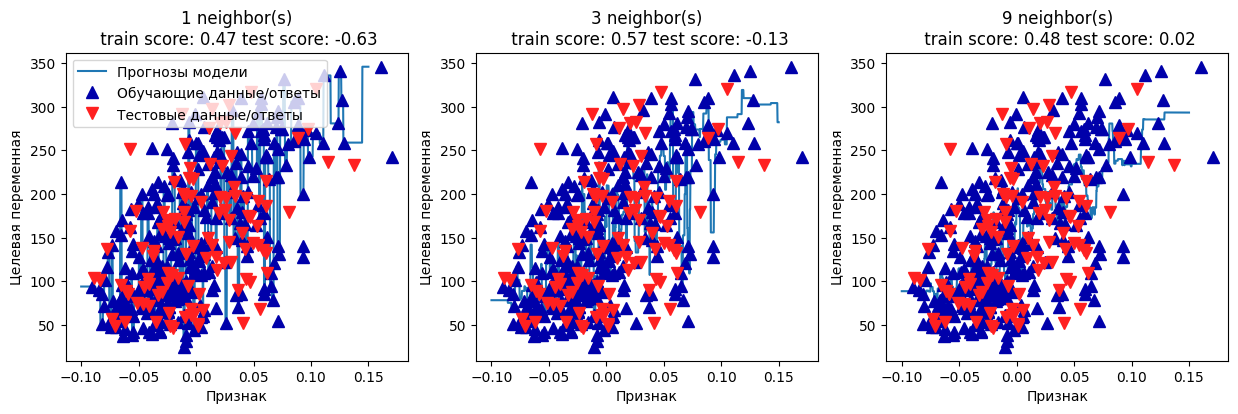

In [69]:
# тут мы уже выбираем только один признак (признак 2) для визуализации
X = diabetes.data[:, 2]
y = diabetes.target

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Создаем три графика
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Создаем линейное пространство для построения линии регрессии
line = np.linspace(-0.1, 0.15, 1000).reshape(-1, 1)

# Проходим по разным значениям количества соседей (1, 3 и 9)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # Создаем модель K-ближайших соседей для регрессии с указанным количеством соседей
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train.reshape(-1, 1), y_train)
    
    # Рисуем график прогнозов модели
    ax.plot(line, reg.predict(line))
    
    # Рисуем обучающие данные и соответствующие им ответы
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    
    # Рисуем тестовые данные и соответствующие им ответы
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    # Устанавливаем заголовок графика, отображая значение количества соседей и коэффициент детерминации R^2 для обучающего и тестового наборов данных
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train.reshape(-1, 1), y_train),
            reg.score(X_test.reshape(-1, 1), y_test)))
    
    # Устанавливаем подпись для оси X
    ax.set_xlabel("Признак")
    
    # Устанавливаем подпись для оси Y
    ax.set_ylabel("Целевая переменная")

# Добавляем легенду к первому графику
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы", "Тестовые данные/ответы"], loc="best")

# Отображаем графики
plt.show()

### LinearRegression

In [70]:
# Импортируем модель линейной регрессии из scikit-learn
from sklearn.linear_model import LinearRegression

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'], diabetes['target'], random_state=0)

# Создаем модель линейной регрессии и обучаем её на обучающих данных и ответах
lr = LinearRegression().fit(X_train, y_train)

In [71]:
# Выводим коэффициенты (веса) модели линейной регрессии
print("lr.coef_: {}".format(lr.coef_))

# Выводим свободный член (пересечение) модели линейной регрессии
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ -43.26198867 -208.66589855  593.40654802  302.89100542 -560.19094014
  261.40753499   -8.86674758  135.93174293  703.18354112   28.34977176]
lr.intercept_: 153.06786205925664


In [72]:
# Вычисляем и выводим коэффициент детерминации (R^2) на обучающем наборе данных
train_score = lr.score(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(train_score))

# Вычисляем и выводим коэффициент детерминации (R^2) на тестовом наборе данных
test_score = lr.score(X_test, y_test)
print("Правильность на тестовом наборе: {:.2f}".format(test_score))

Правильность на обучающем наборе: 0.56
Правильность на тестовом наборе: 0.36


### Ridge

In [73]:
# Импортируем модель гребневой регрессии из scikit-learn
from sklearn.linear_model import Ridge

# Создаем модель гребневой регрессии и обучаем её на обучающих данных и ответах
ridge = Ridge().fit(X_train, y_train)

# Выводим коэффициент детерминации (R^2) на обучающем наборе данных
train_score = ridge.score(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(train_score))

# Выводим коэффициент детерминации (R^2) на тестовом наборе данных
test_score = ridge.score(X_test, y_test)
print("Правильность на тестовом наборе: {:.2f}".format(test_score))

Правильность на обучающем наборе: 0.46
Правильность на тестовом наборе: 0.36


In [74]:
# Создаем модель гребневой регрессии с коэффициентом регуляризации alpha=10 и обучаем её на обучающих данных и ответах
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

# Выводим коэффициент детерминации (R^2) на обучающем наборе данных
train_score = ridge10.score(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(train_score))

# Выводим коэффициент детерминации (R^2) на тестовом наборе данных
test_score = ridge10.score(X_test, y_test)
print("Правильность на тестовом наборе: {:.2f}".format(test_score))

Правильность на обучающем наборе: 0.17
Правильность на тестовом наборе: 0.14


In [75]:
# Создаем модель гребневой регрессии с коэффициентом регуляризации alpha=0.1 и обучаем её на обучающих данных и ответах
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

# Выводим коэффициент детерминации (R^2) на обучающем наборе данных
train_score = ridge01.score(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(train_score))

# Выводим коэффициент детерминации (R^2) на тестовом наборе данных
test_score = ridge01.score(X_test, y_test)
print("Правильность на тестовом наборе: {:.2f}".format(test_score))

Правильность на обучающем наборе: 0.55
Правильность на тестовом наборе: 0.37


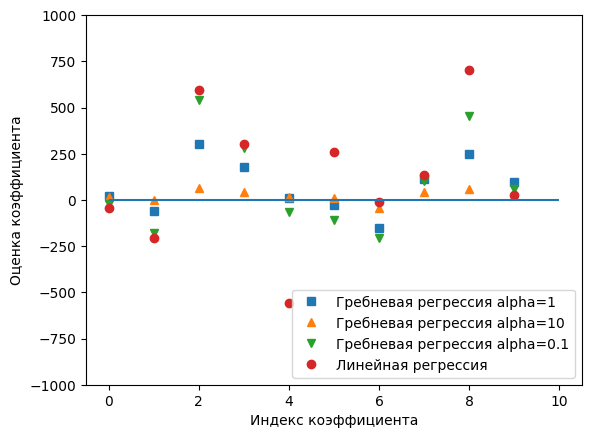

In [76]:
# Строим графики коэффициентов для разных моделей
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")

# Устанавливаем подпись для оси X
plt.xlabel("Индекс коэффициента")

# Устанавливаем подпись для оси Y
plt.ylabel("Оценка коэффициента")

# Рисуем горизонтальные линии на графике
plt.hlines(0, 0, len(lr.coef_))

# Устанавливаем ограничение по вертикальной оси Y
plt.ylim(-1000, 1000)

# Добавляем легенду к графику
plt.legend()

# Отображаем графики
plt.show()

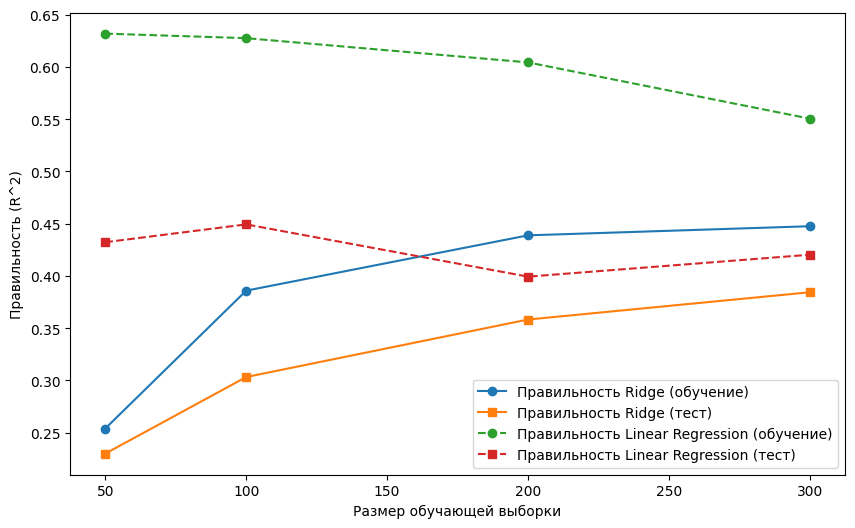

In [79]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Инициализация пустых списков для сохранения результатов
train_scores_ridge = []
test_scores_ridge = []
train_scores_lr = []
test_scores_lr = []

# Размеры обучающей выборки, которые мы хотим проверить
train_sizes = [50, 100, 200, 300]

for size in train_sizes:
    # Разделение данных
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, random_state=0)

    # Обучение модели Ridge
    ridge = Ridge().fit(X_train, y_train)

    # Обучение модели Linear Regression
    lr = LinearRegression().fit(X_train, y_train)

    # Оценка моделей на обучающем наборе
    train_score_ridge = ridge.score(X_train, y_train)
    train_scores_ridge.append(train_score_ridge)

    train_score_lr = lr.score(X_train, y_train)
    train_scores_lr.append(train_score_lr)

    # Оценка моделей на тестовом наборе
    test_score_ridge = ridge.score(X_test, y_test)
    test_scores_ridge.append(test_score_ridge)

    test_score_lr = lr.score(X_test, y_test)
    test_scores_lr.append(test_score_lr)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_ridge, 'o-', label="Правильность Ridge (обучение)")
plt.plot(train_sizes, test_scores_ridge, 's-', label="Правильность Ridge (тест)")
plt.plot(train_sizes, train_scores_lr, 'o--', label="Правильность Linear Regression (обучение)")
plt.plot(train_sizes, test_scores_lr, 's--', label="Правильность Linear Regression (тест)")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("Правильность (R^2)")
plt.legend()
plt.show()
# График показывает, как изменяется производительность моделей с увеличением размера обучающей выборки. 

### Lasso

In [80]:
import numpy as np  
from sklearn.datasets import load_diabetes  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso  

# Загрузка данных load_diabetes()
diabetes = load_diabetes()  # Загружаем данные о диабете.

X = diabetes.data  # Выделяем признаки (набор данных).
y = diabetes.target  # Выделяем целевую переменную (значения диабета).

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Разделяем данные на обучающий (X_train, y_train) и тестовый (X_test, y_test) наборы.

# Создание и обучение модели Lasso с alpha=1.0 (по умолчанию)
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
# Создаем модель Lasso регрессии с коэффициентом регуляризации alpha=1.0 и обучаем её на обучающих данных.

# Оценка модели на обучающем и тестовом наборах
train_score = lasso.score(X_train, y_train)  # Оцениваем модель на обучающем наборе данных и получаем коэффициент детерминации.
test_score = lasso.score(X_test, y_test)  # Оцениваем модель на тестовом наборе данных и получаем коэффициент детерминации.

# Подсчет количества использованных признаков
used_features = np.sum(lasso.coef_ != 0)  # Считаем количество признаков, которые модель использовала в регрессии.

# Выводим результаты
print("Правильность на обучающем наборе: {:.2f}".format(train_score))  # Выводим коэффициент детерминации на обучающем наборе.
print("Правильность на тестовом наборе: {:.2f}".format(test_score))  # Выводим коэффициент детерминации на тестовом наборе.
print("Количество использованных признаков: {}".format(used_features))  # Выводим количество использованных признаков.

Правильность на обучающем наборе: 0.40
Правильность на тестовом наборе: 0.26
Количество использованных признаков: 2


In [81]:
# Создание и обучение модели Lasso с alpha=0.01 и увеличенным max_iter
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

# Оценка модели на обучающем и тестовом наборах
train_score = lasso001.score(X_train, y_train)
test_score = lasso001.score(X_test, y_test)

# Подсчет количества использованных признаков
used_features = np.sum(lasso001.coef_ != 0)

print("Правильность на обучающем наборе: {:.2f}".format(train_score))
print("Правильность на контрольном наборе: {:.2f}".format(test_score))
print("Количество использованных признаков: {}".format(used_features))

Правильность на обучающем наборе: 0.55
Правильность на контрольном наборе: 0.33
Количество использованных признаков: 9


In [82]:
# Создание и обучение модели Lasso с alpha=0.0001 и увеличенным max_iter
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

# Оценка модели на обучающем и тестовом наборах
train_score = lasso00001.score(X_train, y_train)
test_score = lasso00001.score(X_test, y_test)

# Подсчет количества использованных признаков
used_features = np.sum(lasso00001.coef_ != 0)

print("Правильность на обучающем наборе: {:.2f}".format(train_score))
print("Правильность на контрольном наборе: {:.2f}".format(test_score))
print("Количество использованных признаков: {}".format(used_features))

Правильность на обучающем наборе: 0.55
Правильность на контрольном наборе: 0.33
Количество использованных признаков: 10


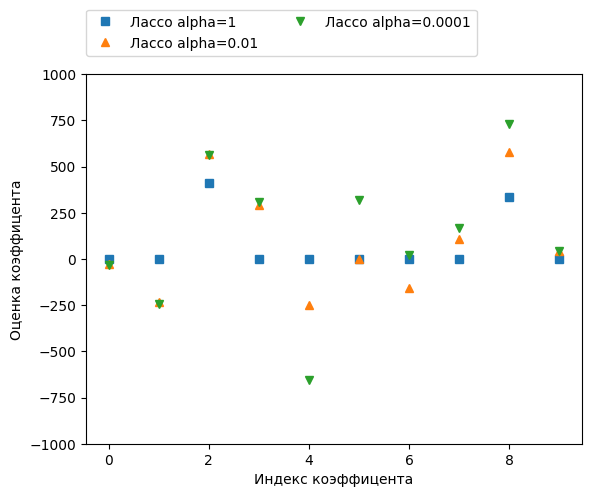

In [83]:
# Создание графика оценок коэффициентов для моделей Lasso с разными значениями alpha
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-1000, 1000)
plt.xlabel("Индекс коэффицента")
plt.ylabel("Оценка коэффицента")
plt.show()

### LogisticRegression

In [84]:
# Импортируем необходимые библиотеки и функции
from sklearn.datasets import load_diabetes  # Загрузка данных о диабете
from sklearn.linear_model import LogisticRegression  # Создание модели логистической регрессии

# Загружаем данные о диабете
diabetes = load_diabetes()

# Разделяем данные на обучающий и тестовый наборы
# X_train - признаки обучающего набора, X_test - признаки тестового набора
# y_train - целевая переменная обучающего набора, y_test - целевая переменная тестового набора
# random_state=42 используется для воспроизводимости разделения данных
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=42)

# Создаем модель логистической регрессии и обучаем ее на обучающих данных
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Выводим правильность (accuracy) модели на обучающем и тестовом наборах данных
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.015
Правильность на тестовом наборе: 0.009


In [85]:
# Создаем модель логистической регрессии с параметром регуляризации C=100 и обучаем ее на обучающих данных
logreg100 = LogisticRegression(C=100)
logreg100.fit(X_train, y_train)

# Выводим правильность (accuracy) модели с C=100 на обучающем и тестовом наборах данных
print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))

Правильность на обучающем наборе: 0.172
Правильность на тестовом наборе: 0.018


In [88]:
# Создаем модель логистической регрессии с параметром регуляризации C=0.01 и обучаем ее на обучающих данных
logreg001 = LogisticRegression(C=0.01)
logreg001.fit(X_train, y_train)

# Выводим правильность (accuracy) модели с C=0.01 на обучающем и тестовом наборах данных
print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.015
Правильность на тестовом наборе: 0.009


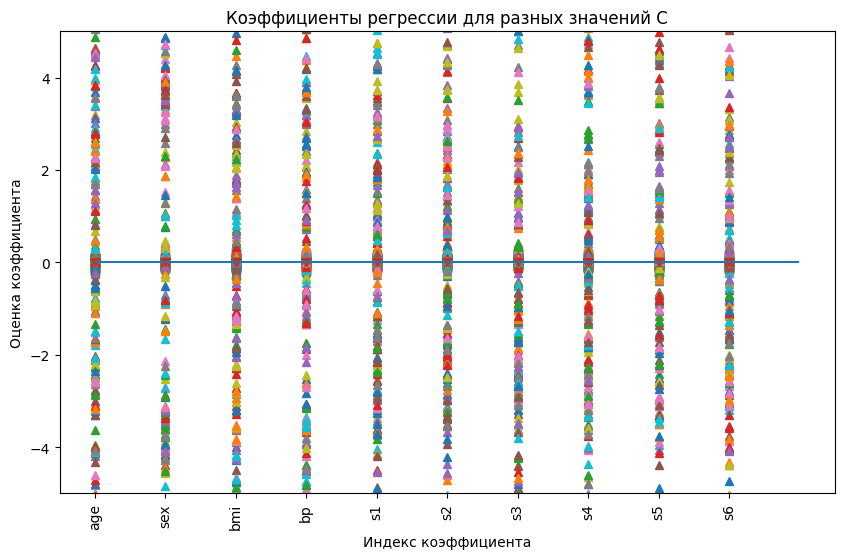

In [92]:
# Создаем фигуру для графика с заданным размером
plt.figure(figsize=(10, 6))

# Строим графики коэффициентов регрессии для разных значений C
# logreg.coef_.T - коэффициенты регрессии для модели с C=1
# logreg100.coef_.T - коэффициенты регрессии для модели с C=100
# logreg001.coef_.T - коэффициенты регрессии для модели с C=0.001
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")

# Устанавливаем метки по оси x, чтобы отобразить имена признаков
plt.xticks(range(diabetes.data.shape[1]), diabetes.feature_names, rotation=90)

# Рисуем горизонтальные линии на уровне 0 для наглядности
plt.hlines(0, 0, diabetes.data.shape[1])

# Устанавливаем ограничения для оси y
plt.ylim(-5, 5)

# Добавляем подписи к осям и заголовок графика
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.title("Коэффициенты регрессии для разных значений C")

# Отображаем график
plt.show()

### Выводы

In [93]:
# Были рассмотрены различные методы машинного обучения, включая линейную регрессию, регуляризацию (гребневую и лассо), K-ближайших соседей (KNN) и логистическую регрессию.
# Регуляризация (гребневая и лассо) позволяет управлять сложностью модели и предотвращать переобучение. 
# Значение параметра регуляризации (C для логистической регрессии) влияет на производительность модели.
# Графики коэффициентов регрессии показывают влияние параметра C на коэффициенты. 
# Высокое значение C приводит к менее сильной регуляризации, а низкое значение C - к более сильной регуляризации.
# K-ближайшие соседи (KNN) используются для задачи регрессии, и количество соседей (n_neighbors) влияет на производительность модели.
# Сложность отображения в виде графика K-ближайших соседей было в том, что в примерах рассматривались датасеты с одним признаком, а в diabetes у нас их 10
# В нашем случае - чем меньше соседей тем лучше значения на обучающем наборе, и намного хуже на тестовом наборе данных. И наоборот с увеличением соседей - увеличиватеся и качество обучаемости на тестовом наборе, на обучающем снижается
# Логистическая регрессия была применена к задаче классификации, и регулирование параметра C влияет на способность модели разделять классы.
# Производительность моделей оценивалась на обучающих и тестовых наборах данных с использованием метрики правильности R^2. 